# TECH CHALLENGE 4
#### Luene Pizzi Mantovani

### Objetivo:
Desenvolver um modelo de Machine Learning
para auxiliar os médicos e médicas a prever se uma pessoa pode ter
obesidade.

In [1]:
### Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import shap
import pickle

In [3]:
# Carregar base
df = pd.read_csv("Obesity.csv")
df.head(5)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Análise Exploratória da Base

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.describe(include='object')

,Gender,family_history,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesity
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [7]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColuna: {col}")
    print(df[col].unique())


Coluna: Gender
['Female' 'Male']

Coluna: family_history
['yes' 'no']

Coluna: FAVC
['no' 'yes']

Coluna: CAEC
['Sometimes' 'Frequently' 'Always' 'no']

Coluna: SMOKE
['no' 'yes']

Coluna: SCC
['no' 'yes']

Coluna: CALC
['no' 'Sometimes' 'Frequently' 'Always']

Coluna: MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

Coluna: Obesity
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
df['FCVC'].unique()

array([2.      , 3.      , 1.      , 2.450218, 2.880161, 2.00876 ,
       2.596579, 2.591439, 2.392665, 1.123939, 2.027574, 2.658112,
       2.88626 , 2.714447, 2.750715, 1.4925  , 2.205439, 2.059138,
       2.310423, 2.823179, 2.052932, 2.596364, 2.767731, 2.815157,
       2.737762, 2.568063, 2.524428, 2.971574, 1.0816  , 1.270448,
       1.344854, 2.959658, 2.725282, 2.844607, 2.44004 , 2.432302,
       2.592247, 2.449267, 2.929889, 2.015258, 1.031149, 1.592183,
       1.21498 , 1.522001, 2.703436, 2.362918, 2.14084 , 2.5596  ,
       2.336044, 1.813234, 2.724285, 2.71897 , 1.133844, 1.757466,
       2.979383, 2.204914, 2.927218, 2.88853 , 2.890535, 2.530066,
       2.241606, 1.003566, 2.652779, 2.897899, 2.483979, 2.945967,
       2.478891, 2.784464, 1.005578, 2.938031, 2.842102, 1.889199,
       2.943749, 2.33998 , 1.950742, 2.277436, 2.371338, 2.984425,
       2.977018, 2.663421, 2.753752, 2.318355, 2.594653, 2.886157,
       2.967853, 2.619835, 1.053534, 2.530233, 2.8813  , 2.824

In [ ]:
df.tail(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
2101,Female,25.722004,1.628470,107.218949,yes,yes,3.0,3.0,Sometimes,no,2.487070,no,0.067329,0.455823,Sometimes,Public_Transportation,Obesity_Type_III
2102,Female,25.765628,1.627839,108.107360,yes,yes,3.0,3.0,Sometimes,no,2.320068,no,0.045246,0.413106,Sometimes,Public_Transportation,Obesity_Type_III
2103,Female,21.016849,1.724268,133.033523,yes,yes,3.0,3.0,Sometimes,no,1.650612,no,1.537639,0.912457,Sometimes,Public_Transportation,Obesity_Type_III
2104,Female,21.682367,1.732383,133.043941,yes,yes,3.0,3.0,Sometimes,no,1.610768,no,1.510398,0.931455,Sometimes,Public_Transportation,Obesity_Type_III
2105,Female,21.285965,1.726920,131.335786,yes,yes,3.0,3.0,Sometimes,no,1.796267,no,1.728332,0.897924,Sometimes,Public_Transportation,Obesity_Type_III
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


### DEFINIÇÃO DE TARGET E FEATURING ENGINEERING

In [8]:
# Criar IMC
df["IMC"] = df["Weight"] / (df["Height"] ** 2)

# Target e features
target = "Obesity"
y = df[target]
X = df.drop(columns=[target])

# One-hot encoding
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [9]:
df['IMC'].describe()

,IMC
count,2111.000000
mean,29.700159
std,8.011337
min,12.998685
25%,24.325802
50%,28.719089
75%,36.016501
max,50.811753


### ANÁLISE DE CORRELAÇÃO DE VARIÁVEIS

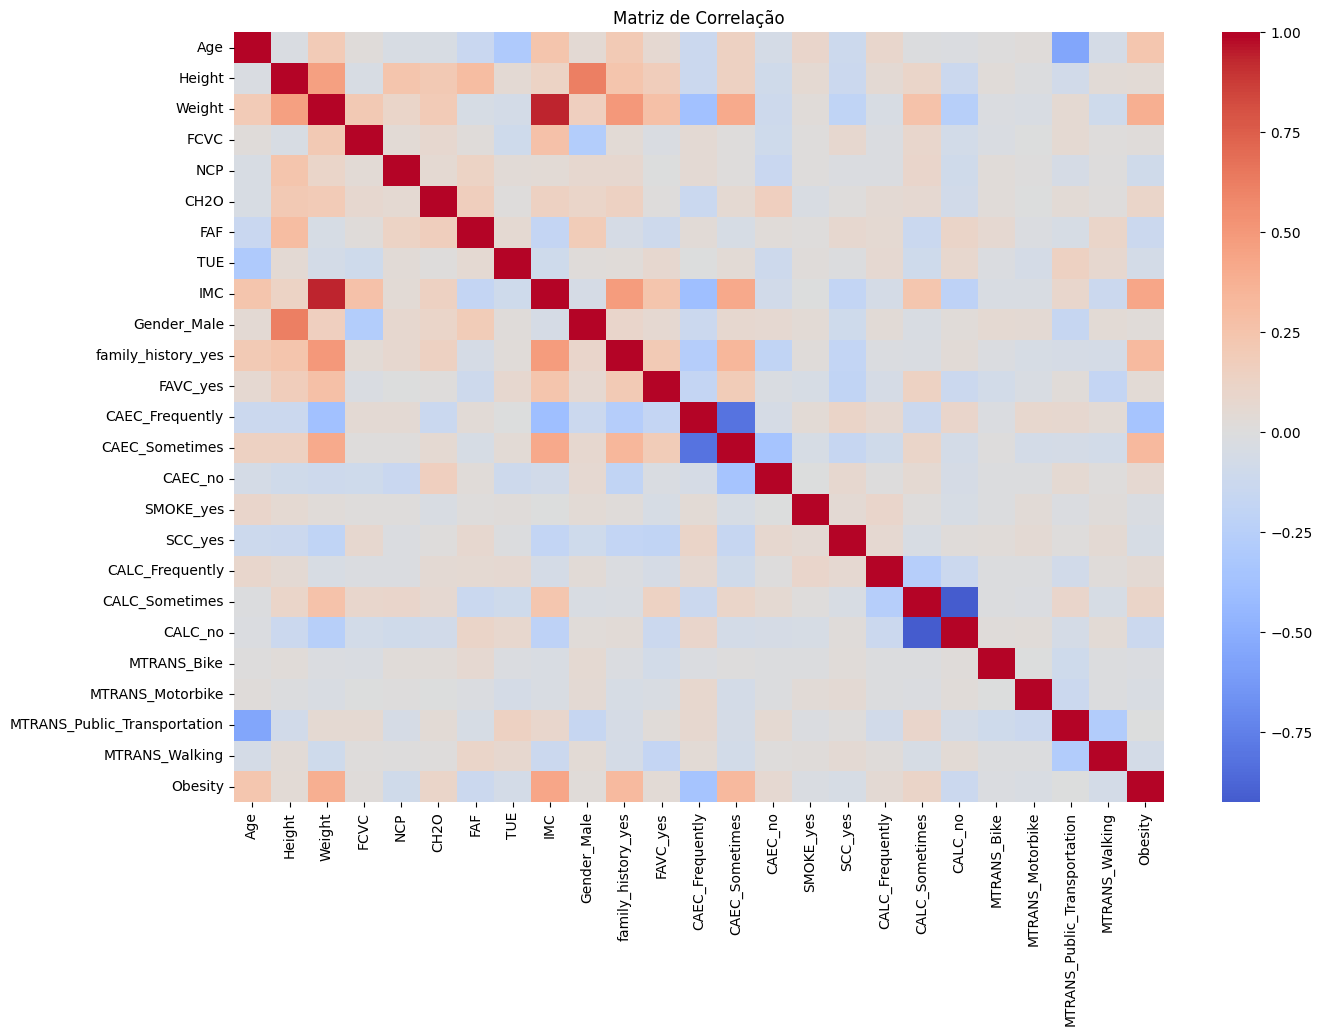

Top 10 variáveis mais correlacionadas com Obesidade:
Obesity               1.000000
IMC                   0.429686
Weight                0.387643
CAEC_Frequently       0.351827
CAEC_Sometimes        0.316962
family_history_yes    0.313667
Age                   0.236170
CALC_no               0.134716
FAF                   0.129564
CALC_Sometimes        0.114104
Name: Obesity, dtype: float64


In [10]:
# Codificar target para correlação
le_corr = LabelEncoder()
y_corr = le_corr.fit_transform(y)

df_corr = X_encoded.copy()
df_corr["Obesity"] = y_corr

# Matriz de correlação
corr_matrix = df_corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação")
plt.show()

print("Top 10 variáveis mais correlacionadas com Obesidade:")
print(corr_matrix["Obesity"].abs().sort_values(ascending=False).head(10))

### MODELAGEM E AVALIAÇÃO DE RESULTADOS

In [11]:
def evaluate_model(model, X, y):
    """
    Treina e avalia um modelo Random Forest.
    Retorna acurácia, F1-score, precisão e recall.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro')

    print(classification_report(y_test, y_pred))
    return acc, f1, precision, recall


In [13]:
# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

# Com IMC
acc_imc, f1_imc, prec_imc, rec_imc = evaluate_model(rf_model, X_encoded, y)

# Sem IMC
X_sem_imc = X_encoded.drop(columns=["IMC"])
acc_sem, f1_sem, prec_sem, rec_sem = evaluate_model(rf_model, X_sem_imc, y)

# Sem Peso e Altura

X_sem_p = X_encoded.drop(columns=["Weight", "Height"])
acc_sem_p, f1_sem_p, prec_sem_p, rec_sem_p = evaluate_model(rf_model, X_sem_p, y)


# Tabela comparativa
metrics_df = pd.DataFrame({
    "Cenário": ["Com IMC", "Sem IMC", "Sem Peso e Altura"],
    "Acurácia": [f"{acc_imc*100:.2f}%", f"{acc_sem*100:.2f}%", f"{acc_sem_p*100:.2f}%"],
    "F1-score": [f"{f1_imc*100:.2f}%", f"{f1_sem*100:.2f}%",  f"{f1_sem_p*100:.2f}%"],
    "Precisão": [f"{prec_imc*100:.2f}%", f"{prec_sem*100:.2f}%", f"{prec_sem_p*100:.2f}%"],
    "Recall": [f"{rec_imc*100:.2f}%", f"{rec_sem*100:.2f}%", f"{rec_sem_p*100:.2f}%"]
})

print("Métricas comparativas:")
display(metrics_df)


                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        54
      Normal_Weight       0.89      0.98      0.93        58
     Obesity_Type_I       0.99      1.00      0.99        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.98      0.91      0.95        58
Overweight_Level_II       1.00      0.98      0.99        58

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.78      0.93      0.85        58
     Obesity_Type_I       0.96      0.97      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III 

,Cenário,Acurácia,F1-score,Precisão,Recall
0,Com IMC,97.87%,97.82%,97.97%,97.77%
1,Sem IMC,94.33%,94.29%,94.72%,94.13%
2,Sem Peso e Altura,97.16%,97.12%,97.33%,97.06%


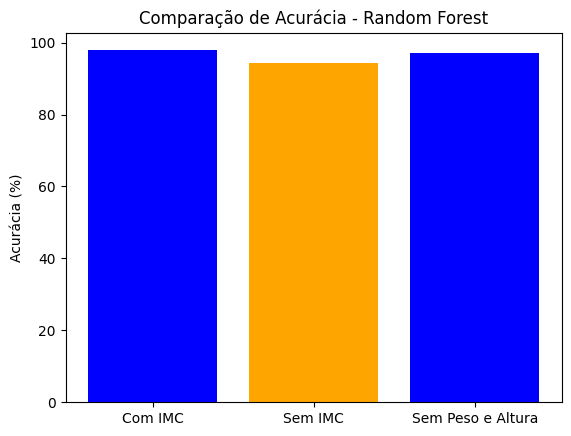

In [14]:
plt.bar(["Com IMC", "Sem IMC", "Sem Peso e Altura"], [acc_imc*100, acc_sem*100, acc_sem_p*100], color=["blue", "orange"])
plt.title("Comparação de Acurácia - Random Forest")
plt.ylabel("Acurácia (%)")
plt.show()

In [15]:
# Treinar modelo final com IMC
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_final = RandomForestClassifier(n_estimators=300, random_state=42)
rf_final.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

### PIPELINE

In [16]:
df = pd.read_csv("Obesity.csv")

In [17]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [18]:
# # Feature engineering
def feature_engineering(df):
    df["IMC"] = df["Weight"] / (df["Height"] ** 2)
    return df

# # Transformador
feature_eng = FunctionTransformer(feature_engineering, validate=False)

# Colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder="passthrough"
)

# Pipeline
pipeline_rf = Pipeline(steps=[
    ("feature_eng", feature_eng),
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

# Split com X original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline_rf.fit(X_train, y_train)

print("Pipeline treinada com sucesso!")


# Salvar pipeline
with open("pipeline_random_forest.pkl", "wb") as f:
    pickle.dump(pipeline_rf, f)

print("Pipeline salva como pipeline_random_forest.pkl")



Pipeline treinada com sucesso!
Pipeline salva como pipeline_random_forest.pkl


In [19]:
pipeline_rf

Pipeline(steps=[('feature_eng',
                 FunctionTransformer(func=<function feature_engineering at 0x7bf3ab334040>)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE', 'IMC'])])),
                ('model',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [20]:
# Avaliação no conjunto de teste
y_pred = pipeline_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro')

print(f"Acurácia: {acc*100:.4f}%")
print(f"F1-score: {f1*100:.4f}%")
print(f"Precisão: {prec*100:.4f}%")
print(f"Recall: {rec*100:.4f}%")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 98.3452%
F1-score: 98.2987%
Precisão: 98.3870%
Recall: 98.2658%

Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        54
      Normal_Weight       0.92      0.98      0.95        58
     Obesity_Type_I       0.99      1.00      0.99        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.98      0.93      0.96        58
Overweight_Level_II       1.00      1.00      1.00        58

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423



In [21]:
def prever_paciente(pipeline, dados_paciente):
    """
    Recebe dicionário com dados do paciente e retorna a previsão.
    """
    df_paciente = pd.DataFrame([dados_paciente])  # Converte para DataFrame
    pred = pipeline.predict(df_paciente)[0]
    return pred

In [22]:
novo_paciente = {
    "Gender": "Male",
    "Age": 25,
    "Height": 1.75,
    "Weight": 85,
    "family_history": "yes",
    "FAVC": "no",
    "FCVC": 2,
    "NCP": 3,
    "CAEC": "Sometimes",
    "SMOKE": "no",
    "CH2O": 2,
    "SCC": "no",
    "FAF": 1,
    "TUE": 1,
    "CALC": "no",
    "MTRANS": "Public_Transportation"
}

previsao = prever_paciente(pipeline_rf, novo_paciente)
print("Classe prevista para o paciente:", previsao)


Classe prevista para o paciente: Overweight_Level_II


In [23]:
novo_paciente_2 = {
    "Gender": "Female",
    "Age": 53,
    "Height": 1.55,
    "Weight": 150,
    "family_history": "yes",
    "FAVC": "no",
    "FCVC": 2,
    "NCP": 3,
    "CAEC": "Sometimes",
    "SMOKE": "no",
    "CH2O": 2,
    "SCC": "no",
    "FAF": 1,
    "TUE": 1,
    "CALC": "no",
    "MTRANS": "Public_Transportation"
}

previsao = prever_paciente(pipeline_rf, novo_paciente_2)
print("Classe prevista para o paciente:", previsao)


Classe prevista para o paciente: Obesity_Type_II
